# Documentation

## Data

###  Load relevant libraries 

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns

###  Load the data

In [2]:
cc = pd.read_csv('creditcard.csv')

###  Data Wrangling 

In [3]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
cc.shape

(284807, 31)

In [6]:
cc.dtypes.value_counts()

float64    30
int64       1
dtype: int64

In [7]:
round(cc.describe(), 2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [8]:
null_count = cc.isnull().sum(axis=0).sort_values(ascending=False)
null_count.head(10)

Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
dtype: int64

In [9]:
values_count = cc.nunique().sort_values()
np.sum(values_count == 1)

0

In [10]:
duplicates = []
for i, ref in enumerate(cc.columns[:-1]):
    for x in cc.columns[i + 1:-1]:
        if x not in duplicates and np.all(cc[ref] == cc[x]):
            duplicates.append(x)    
len(duplicates)

0

This is a very clean dataset. It looks like we do not have to clean the data that much.

### EDA

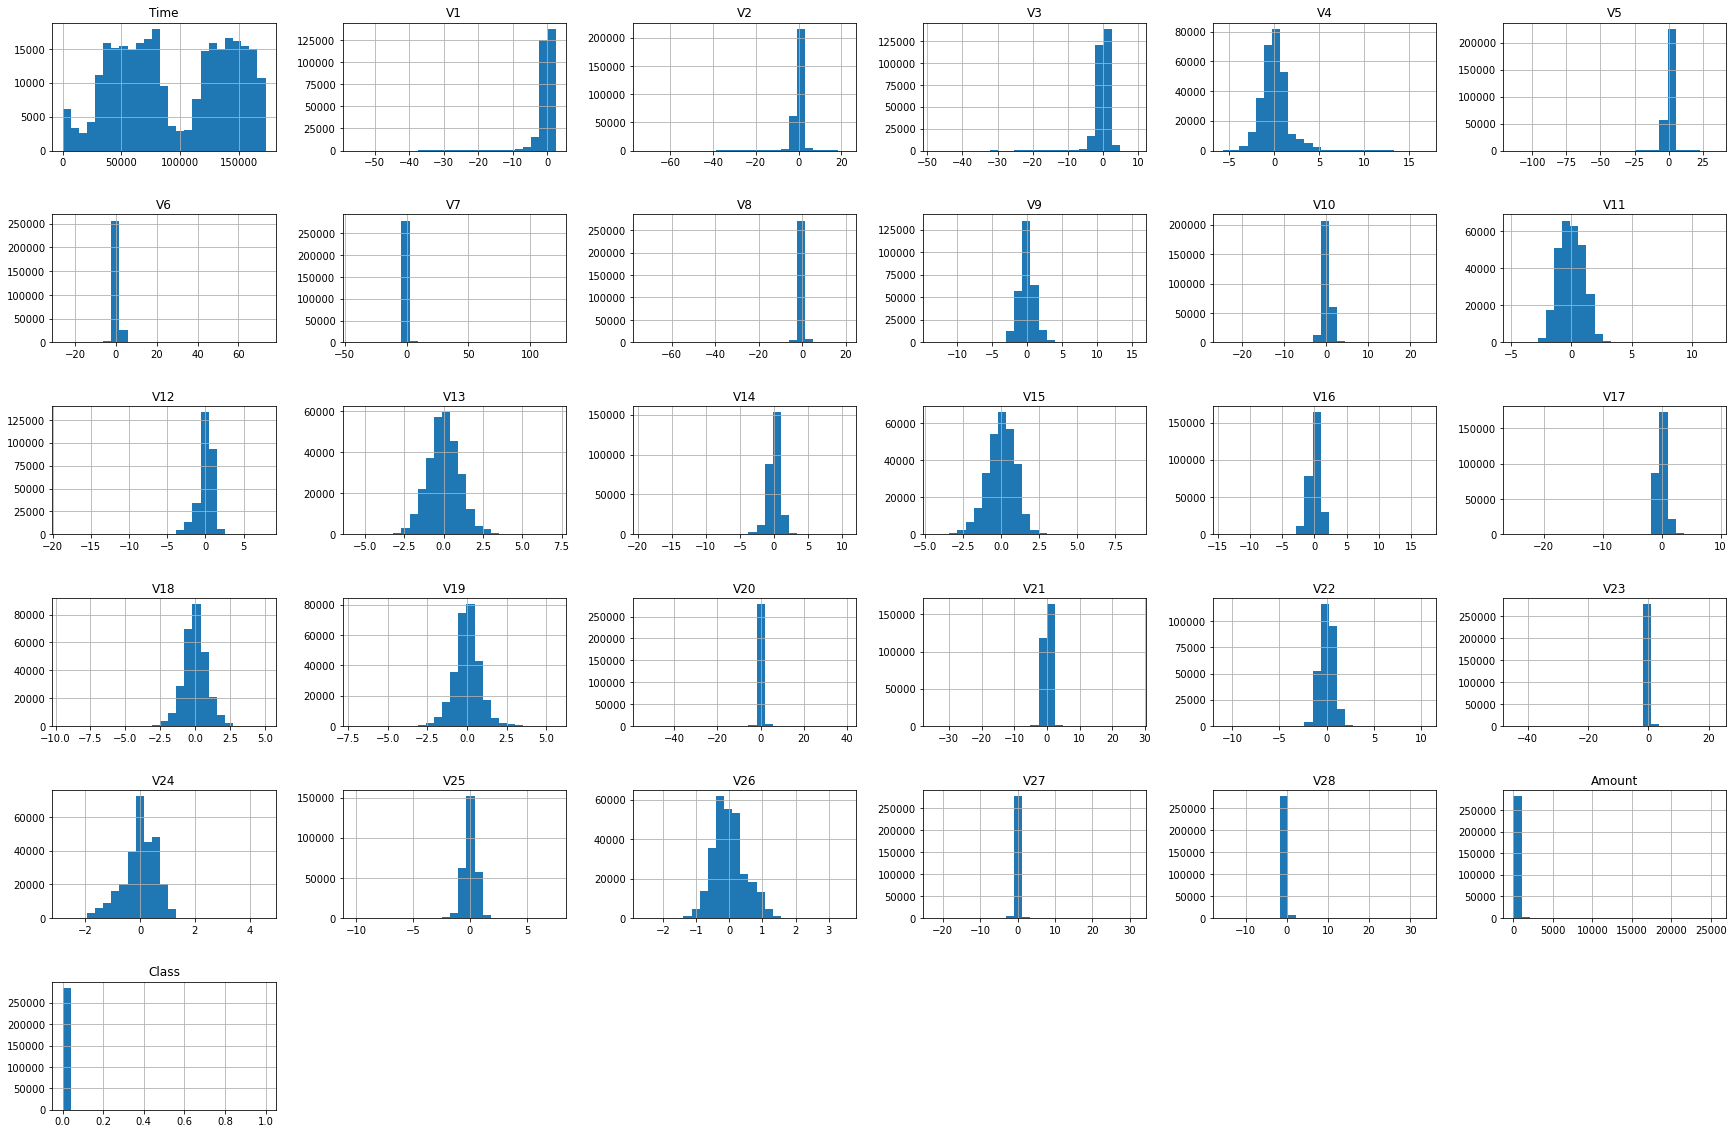

In [11]:
cc.hist(bins=25,figsize=(30,20))
plt.subplots_adjust(hspace=.5)
plt.show()

Histogram of all of the features in our dataset.

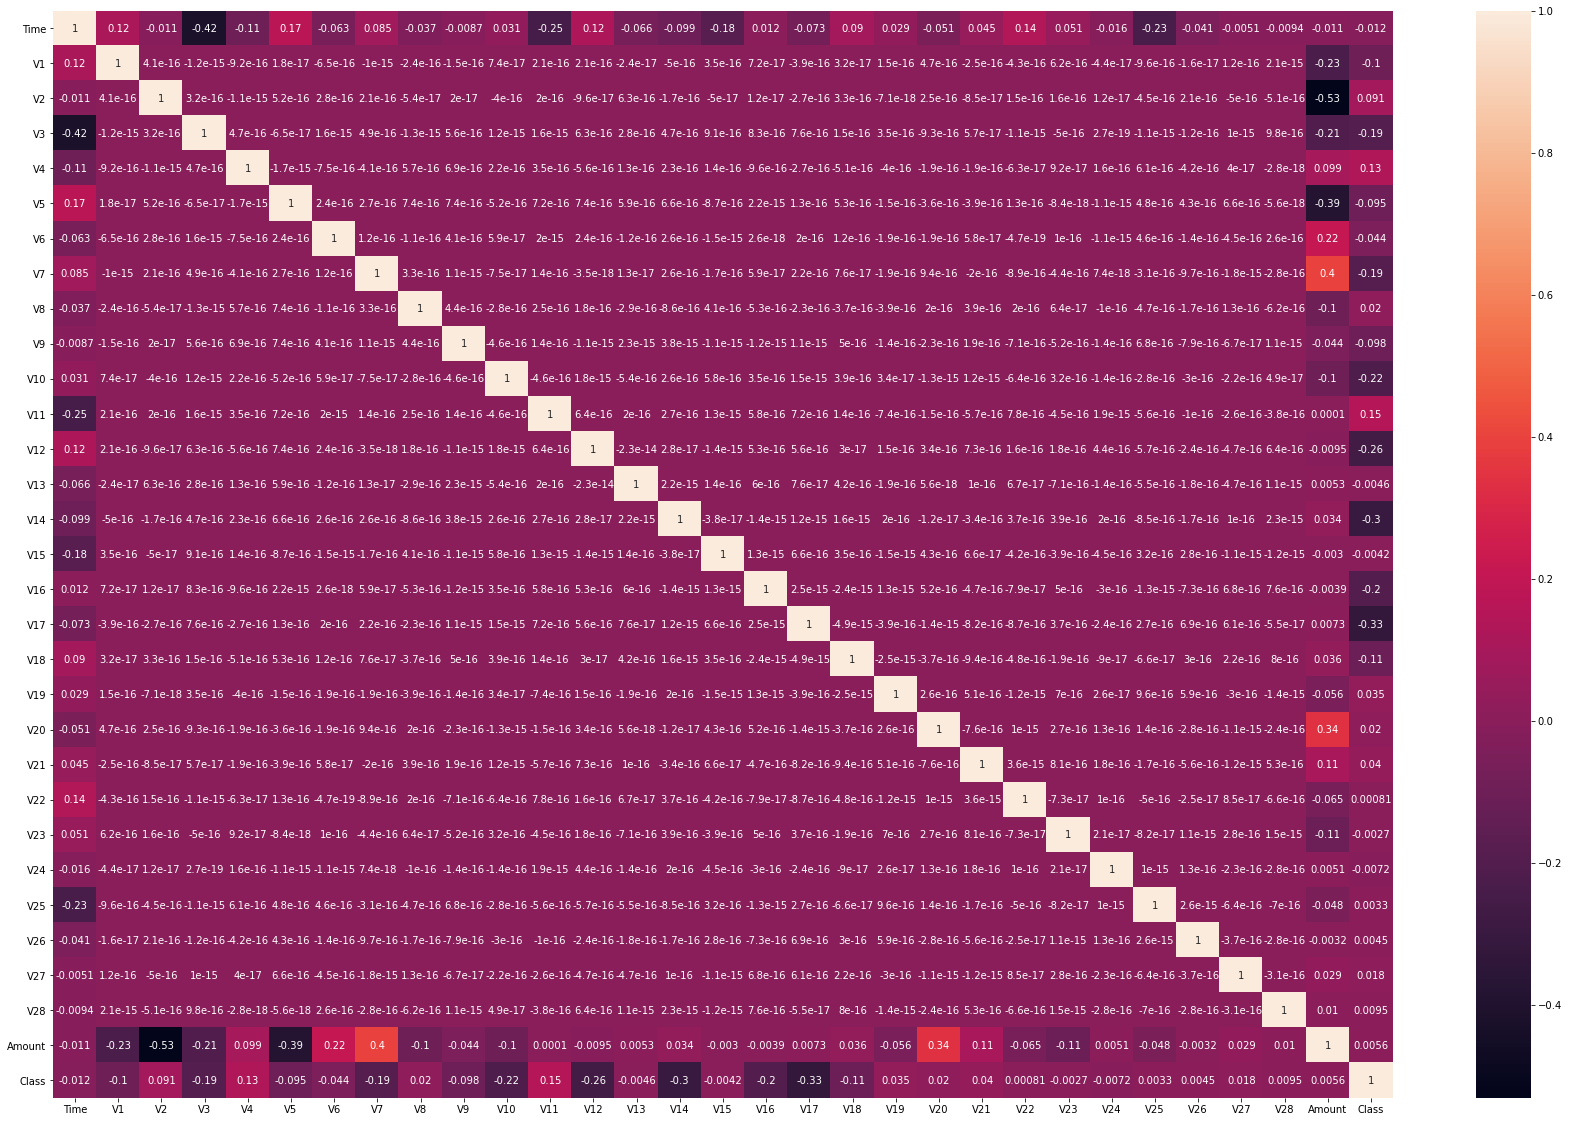

In [12]:
plt.subplots(figsize=(30,20))
sns.heatmap(cc.corr(), annot=True);

Heatmap to show correlation between the different variables.

In [13]:
cc['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

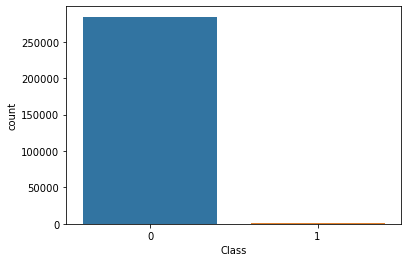

In [14]:
sns.countplot(data=cc,x="Class")

In [15]:
legit = cc[cc['Class'] == 0]
fraud = cc[cc['Class'] == 1]

In [16]:
Num_of_Legit = round(cc['Class'].value_counts()[1]/len(cc)*100,3)
Num_of_Fraud = round(cc['Class'].value_counts()[0]/len(cc)*100,3)


print("Number of Fraud Values :\t\t  \t   ",cc['Class'].value_counts()[1])
print("Number of Legitimate Values :\t\t        ",cc['Class'].value_counts()[0])
print("\n")
print("% of Fraud transactions :  \t\t ", Num_of_Legit)
print("% of Legitimate transactions :  ", Num_of_Fraud)

Number of Fraud Values :		  	    492
Number of Legitimate Values :		         284315


% of Fraud transactions :  		  0.173
% of Legitimate transactions :   99.827


Pie Chart:


Text(0, 0.5, '')

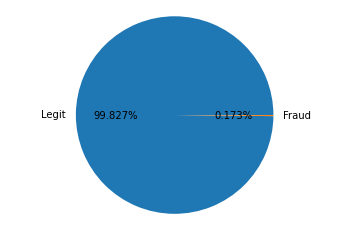

In [17]:
print("Pie Chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(cc['Class'].value_counts(),autopct='%1.3f%%', labels=['Legit','Fraud'])
plt.axis('equal')
plt.ylabel('')

We have ourselves a very unbalanced dataset. Only 0.173% of the transactions are frauds. This will cause a problem with our ML model, but we can fix this problem by undersampling our data, which we will do later.

In [18]:
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Statistical measure of both fraud and legitimate cases.

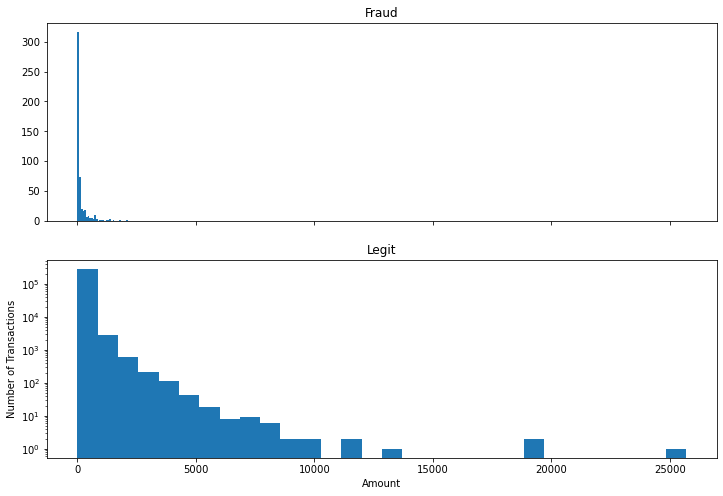

In [20]:
fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,8))

bins = 30

axis_1.hist(cc.Amount[cc.Class == 1], bins = bins)
axis_1.set_title('Fraud')

axis_2.hist(cc.Amount[cc.Class == 0], bins = bins)
axis_2.set_title('Legit')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale("log")
plt.show()

We compare the legitimate amount to the fraud amount. We can see here the there is alot less fraud amount than legit amount in both transactions and amount. This is completely reasonable, but these two variable cannot be the sole bases of whether a transactions is fraudelent or not.

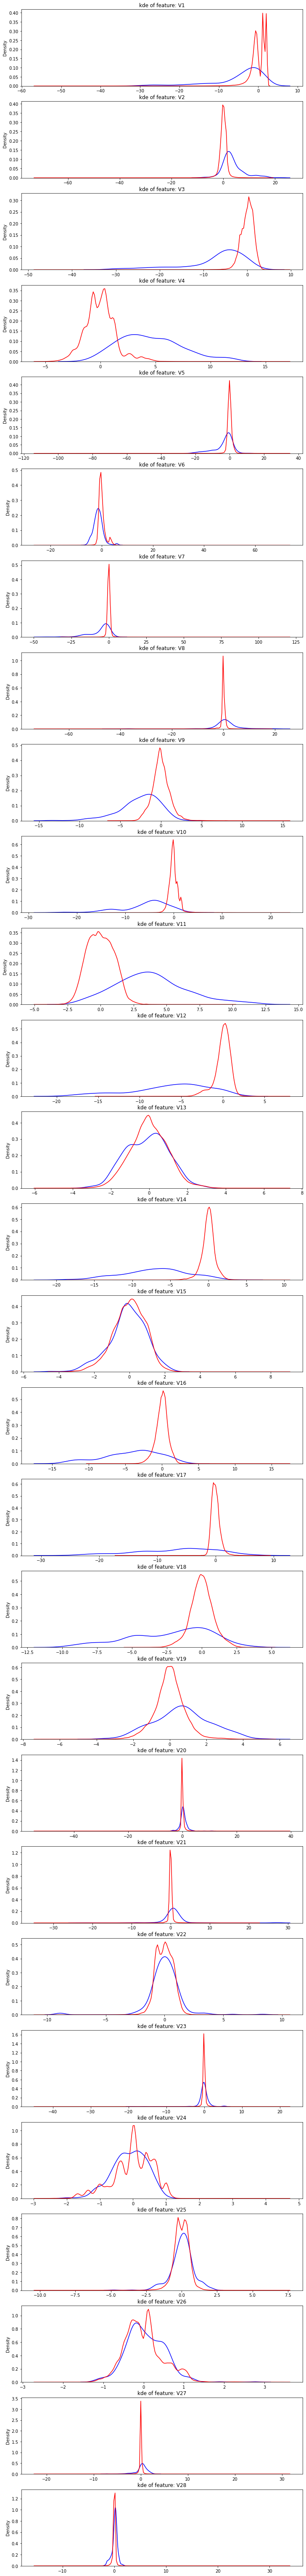

In [21]:
features = cc.iloc[:,1:29].columns


plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, n in enumerate(cc[features]):
    ax = plt.subplot(gs[i])
    sns.kdeplot(cc[n][cc.Class == 1],label="Fraud", color='blue')
    sns.kdeplot(cc[n][cc.Class == 0],label="Normal", color='red')
    ax.set_xlabel('')
    ax.set_title('kde of feature: '+n)
plt.show()

Comparing the kde of legitimate cases and fraud cases. We can see here that some of the legitimate and fraud distribution are similar while others are different. We may be able use this to dectect whether a transaction is fraudulent or not.

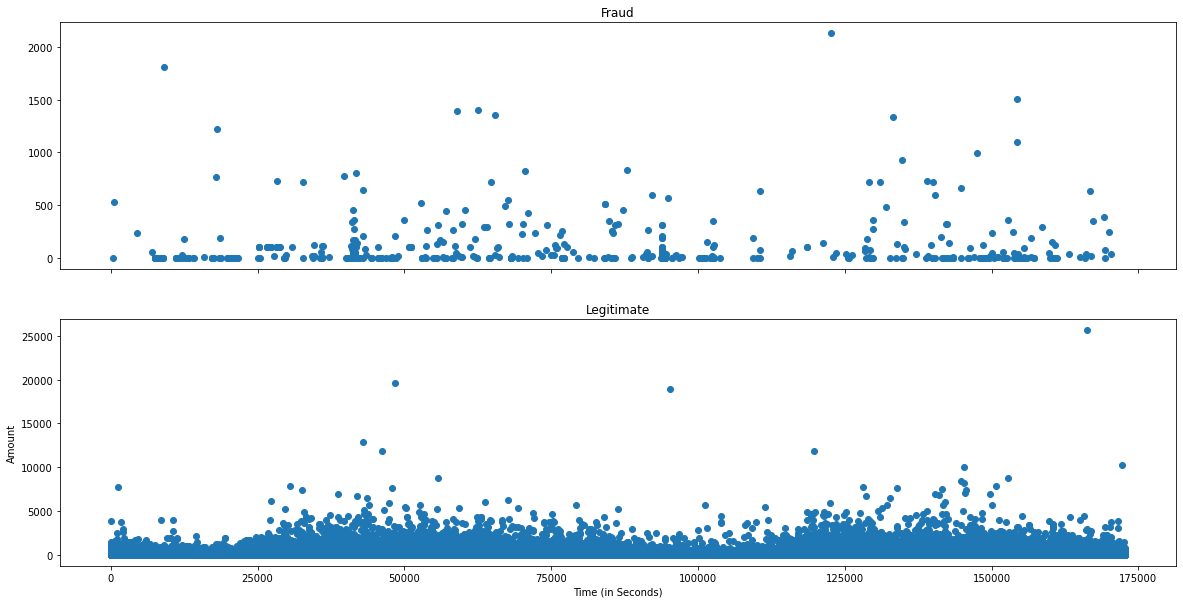

In [22]:
fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

axis_1.scatter(cc.Time[cc.Class == 1], cc.Amount[cc.Class == 1])
axis_1.set_title('Fraud')

axis_2.scatter(cc.Time[cc.Class == 0], cc.Amount[cc.Class == 0])
axis_2.set_title('Legitimate')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


We compare the legitimate transaction vs the fraudulent transaction by using a scatterplot. It looks like the data is very scattered and we might not be able to use it for our judgement.

In [23]:
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Preprocessing

We are going to undersample because the data is imbalanced.

In [24]:
cc.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [25]:
legit = cc[cc['Class'] == 0]
fraud = cc[cc['Class'] == 1]

In [26]:
# Sampled 492 samples from the legit df because we are using undersampling for this project
legit_sample = legit.sample(n=492)

In [27]:
# Concatenating the legit_sample with fraud to make a new df
new_df = pd.concat([legit_sample, fraud], axis=0)

In [28]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
237585,149308.0,1.110778,-2.424033,-3.406077,-0.495741,-0.085194,-1.277780,1.396217,-0.887822,-1.196988,...,0.826142,1.060672,-0.896991,-0.557698,0.655872,0.273659,-0.212511,0.012809,653.58,0
264121,161276.0,1.924971,-0.468448,-0.170414,0.440367,-0.832174,-0.354893,-0.711595,0.086950,1.232557,...,0.249675,0.932751,0.120592,0.097548,-0.146190,-0.237815,0.036803,-0.045884,9.99,0
251526,155380.0,2.018155,0.078217,-1.613722,0.350389,0.340054,-0.674645,0.055148,-0.074942,0.292296,...,-0.305854,-0.836125,0.355946,0.656998,-0.329132,0.144121,-0.069370,-0.039697,1.98,0
269178,163573.0,2.059200,-0.076235,-1.100071,0.394296,-0.098412,-1.094497,0.152099,-0.291249,0.580240,...,-0.291008,-0.707294,0.341477,-0.090204,-0.311759,0.206267,-0.069083,-0.061800,1.29,0
249551,154462.0,2.087413,-0.219804,-1.695477,-0.141344,0.658975,0.162965,0.023231,-0.107625,0.670204,...,0.148852,0.771253,-0.129306,-0.036467,0.466508,0.278390,-0.034425,-0.075797,4.71,0


In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 237585 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64

In [30]:
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,88527.679878,-2.387405,1.813184,-3.506684,2.243814,-1.586557,-0.695541,-2.782117,0.267191,-1.274434,...,0.338663,-0.002003,-0.023645,-0.061102,0.014960,0.042366,0.076849,0.028370,102.380244,0.500000
std,47980.953843,5.531891,3.679705,6.225273,3.215169,4.180113,1.752111,5.849398,4.874954,2.334459,...,2.795583,1.168534,1.181374,0.560188,0.671528,0.482911,1.042158,0.456668,214.114439,0.500254
min,2.000000,-30.552380,-13.317464,-31.103685,-3.812993,-22.105532,-7.209442,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-3.018642,0.000000,0.000000
25%,46005.250000,-2.784711,-0.143241,-5.113334,-0.212674,-1.758617,-1.545705,-3.103817,-0.200278,-2.310460,...,-0.184419,-0.547329,-0.247714,-0.400890,-0.315792,-0.277708,-0.070557,-0.059782,1.520000,0.000000
50%,80266.500000,-0.760429,0.948586,-1.389359,1.291466,-0.399491,-0.621500,-0.646386,0.137664,-0.681072,...,0.134308,-0.007526,-0.031591,-0.018542,0.044333,-0.009778,0.041737,0.034804,20.000000,0.500000
75%,134962.500000,1.003653,2.833075,0.380650,4.229802,0.483195,0.036272,0.296440,0.817606,0.169350,...,0.645756,0.585272,0.197206,0.364593,0.394096,0.330184,0.444756,0.209770,99.990000,1.000000
max,172546.000000,2.354123,22.057729,3.053281,12.114672,11.095089,6.474115,5.802537,20.007208,5.125245,...,27.202839,8.361985,5.466230,1.148143,2.208209,2.745261,3.203417,2.066743,2125.870000,1.000000


In [31]:
Num_of_Legit = round(new_df['Class'].value_counts()[1]/len(new_df)*100,3)
Num_of_Fraud = round(new_df['Class'].value_counts()[0]/len(new_df)*100,3)


print("Number of Fraud Values :\t\t  \t   ",new_df['Class'].value_counts()[1])
print("Number of Legitimate Values :\t\t        ",new_df['Class'].value_counts()[0])
print("\n")
print("% of Fraud transactions :  \t\t ", Num_of_Legit)
print("% of Legitimate transactions :  ", Num_of_Fraud)

Number of Fraud Values :		  	    492
Number of Legitimate Values :		         492


% of Fraud transactions :  		  50.0
% of Legitimate transactions :   50.0


<AxesSubplot:xlabel='Class', ylabel='count'>

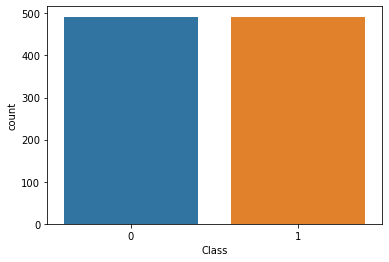

In [32]:
sns.countplot(data=new_df,x="Class")

Pie Chart:


Text(0, 0.5, '')

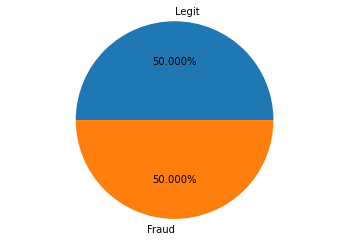

In [33]:
print("Pie Chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(new_df['Class'].value_counts(),autopct='%1.3f%%', labels=['Legit','Fraud'])
plt.axis('equal')
plt.ylabel('')

In [34]:
# Checking if there was any change to the data
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96308.552846,-0.002862,0.002590,0.019913,-0.054402,-0.021888,0.006655,0.004498,-0.036255,0.032256,...,-0.013214,-0.036262,-0.018056,-0.006982,-0.017073,-0.011530,0.033084,-0.016877,-0.018927,82.549167
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [35]:
cc.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [36]:
X = new_df.drop(['Class'], axis = 1).values
y = new_df['Class']

# Standardizing the data with StandardScaler()
X = StandardScaler().fit_transform(X)

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [37]:
print(X)

[[ 1.26740348  0.63268807 -1.15209563 ... -0.27779507 -0.03409261
   2.57563223]
 [ 1.51696263  0.77994464 -0.62037378 ... -0.03844533 -0.16268316
  -0.43171879]
 [ 1.39401805  0.79679813 -0.4717359  ... -0.14037472 -0.14912702
  -0.46914771]
 ...
 [ 1.68534416  0.30950221 -0.18674517 ...  0.29593919  0.3636685
  -0.11443739]
 [ 1.69816826 -0.13138293 -0.33370718 ...  0.77573405 -0.61798467
   0.66642998]
 [ 1.7061338   0.79206334 -0.44991369 ... -0.07090926 -0.0956956
  -0.2796667 ]]


In [38]:
print(y)

237585    0
264121    0
251526    0
269178    0
249551    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


### Modeling

In [39]:
import warnings
warnings.filterwarnings("ignore")
# Logistic regression
# Creating the hyperparameter grid
c_space = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Modeling
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)
y_pred = logreg_cv.predict(X_test)
test_lr = accuracy_score(y_pred, y_test)

# Printing out scores
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))
print("Accuracy is {}".format(test_lr))
print('\n')
print(classification_report(y_pred,y_test))

Tuned Logistic Regression Parameters: {'C': 100, 'penalty': 'l2'}
Best score is 0.9453438684189308
Accuracy is 0.9543147208121827


              precision    recall  f1-score   support

           0       0.97      0.94      0.96       104
           1       0.94      0.97      0.95        93

    accuracy                           0.95       197
   macro avg       0.95      0.96      0.95       197
weighted avg       0.95      0.95      0.95       197



In [40]:
# DecisionTree Classifier
# Creating the hyperparameter grid
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

# Modeling
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
y_pred_gct = grid_tree.predict(X_test)
test_dtc = accuracy_score(y_pred_gct, y_test)

# Printing out the Accuracy and the confusion matrix
print("Tuned DecisionTree Parameters: {}".format(grid_tree.best_params_)) 
print("Best score is {}".format(grid_tree.best_score_))
print("Accuracy is {}".format(test_dtc))
print('\n')
print(classification_report(y_pred_gct,y_test))

Tuned DecisionTree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 6}
Best score is 0.9161251310166895
Accuracy is 0.9086294416243654


              precision    recall  f1-score   support

           0       0.90      0.92      0.91        99
           1       0.92      0.90      0.91        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



In [41]:
# Support Vector Classifier
# Creating the hyperparameter grid
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

# Modeling
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
y_pred_gsvc = grid_svc.predict(X_test)
test_svc = accuracy_score(y_pred_gsvc, y_test)

# Printing out the Accuracy and the confusion matrix
print("Tuned SVC Parameter: {}".format(grid_svc.best_params_))
print("Best score is {}".format(grid_svc.best_score_))
print("Accuracy is {}".format(test_svc))
print('\n')
print(classification_report(y_pred_gsvc,y_test))

Tuned SVC Parameter: {'C': 0.7, 'kernel': 'linear'}
Best score is 0.9428122228493108
Accuracy is 0.9441624365482234


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       102
           1       0.94      0.95      0.94        95

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



In [42]:
# kNN
# Creating the hyperparameter grid
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
y_pred_gknn = grid_knears.predict(X_test)
test_gknn = accuracy_score(y_pred_gknn, y_test)


print("Tuned kNN Parameter: {}".format(grid_knears.best_params_))
print("Best score is {}".format(grid_knears.best_score_))
print("Accuracy is {}".format(test_gknn))
print('\n')
print(classification_report(y_pred_gknn,y_test))

Tuned kNN Parameter: {'algorithm': 'auto', 'n_neighbors': 3}
Best score is 0.9072321212609852
Accuracy is 0.934010152284264


              precision    recall  f1-score   support

           0       0.97      0.91      0.94       108
           1       0.90      0.97      0.93        89

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197



## Conclusion

We preformed undersampling on the data because the data was imbalanced. Undersampling is a technique that people use to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class. We then starndarized that data used split the data into training set and testing set. We modeled various classifiers and tuned it using GridSearch and found that Logistic Regression with the best parameters is the best model because because it has best scores when you compare the precision, recall, accuracy.